In [76]:
import numpy as np
import util
from linear_model import LinearModel

import matplotlib.pyplot as plt

In [77]:
train_path = 'data/ds1_train.csv'
eval_path = 'data/ds1_valid.csv'

In [78]:
x_train, y_train = util.load_dataset(train_path, add_intercept=True)
x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)

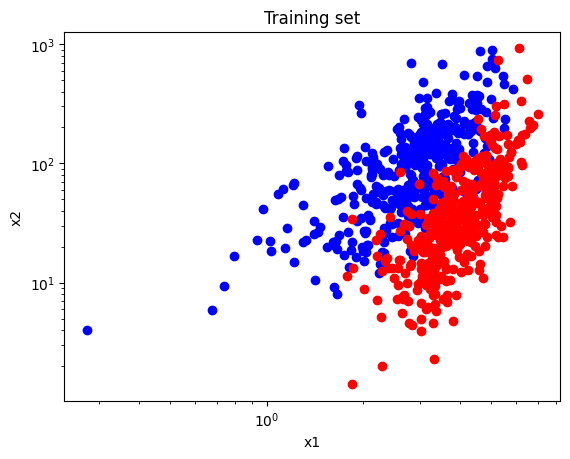

In [79]:
for i, x_i in enumerate(x_train):
    color = 'r' if y_train[i] == 1 else 'b'
    plt.scatter(x_i[1], x_i[2], c=color)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training set')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [80]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def sigmoid(self, x, theta):
        exponent = np.exp(-np.dot(x, theta))

        sig = 1 / (1 + exponent)

        return sig

    def gradient(self, x, y):
        """Calculate the gradient during each epoch.

        Args:
            x: Training example inputs. Shape (m, n)
            y: Training example labels.
        
        """

        gradient = np.zeros(x.shape[1])
        for i in range(len(y)):
            #Sum contributions from each training example in the training set
            sig = self.sigmoid(x[i, :], self.theta) #calculate activation
            gradient += (sig - y[i]) * x[i, :] #update gradient using appropriate formula, 


        return gradient

    def hessian(self, x):
        """Calculate the Hessian matrix from training data.

        Args:
            x: Training example inputs. Shape (m, n)
        
        Returns:
            hessian: Hessian matrix for the training inputs.
        """

        no_features = x.shape[1] #number of features in the input data
        no_examples = x.shape[0]
        hessian = np.zeros((no_features, no_features)) #initialse empty square matrix

        for i in range(no_features):
            for j in range(no_features):
                for k in range(no_examples):
                    x_i = x[k] #select single training example
                    sig = self.sigmoid(x_i, self.theta) #get sigmoid activation value for the example
                    hessian[i][j] += (x_i[i] * x_i[j]) * sig * (1-sig) #add to corresponding hessian element
                
        return hessian

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        
        #Epsilon- small parameter that measures theta convergence.
        eps = 1e-5

        #Number of input features 
        no_features = x.shape[1]
        
        if self.theta is None:
            self.theta = np.zeros(no_features)

        #Initialise thetas
        old_theta = np.add(self.theta, 1)
        
        

        #Keep doing gradient descent until theta updates < eps.
        
        while abs(np.linalg.norm(self.theta - old_theta, ord=1)) >= eps:
            
            #Get gradient
            gradient = self.gradient(x, y)

            #Get Hessian matrix and invert
            hessian = self.hessian(x=x)
            inv_hessian = np.linalg.inv(hessian)
            
            #Update theta values using gradient ascent to maxmimise likelihood.
            old_theta = self.theta
            self.theta = self.theta - np.dot(inv_hessian, gradient)
            print('New theta is: ', self.theta)




    def predict(self, x):
        """Make a prediction given new inputs x, i.e. from a validation set.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """

        predicted_labels = [] #empty list where we will store our predicted labels

        for x_i in x:
            #Decision boundary is where theta dot x = 0
            if np.dot(x_i, self.theta) >= 0:
                predicted_labels.append(1) #class 1
            else:
                predicted_labels.append(0) #class 0
        
        return predicted_labels


In [81]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
predicted_labels = clf.predict(x_eval)

New theta is:  [-3.2043369   1.15293034 -0.00915559]
New theta is:  [-4.76587158  1.81741612 -0.01856449]
New theta is:  [-5.79890392  2.27368058 -0.02622167]
New theta is:  [-6.20902699  2.45460489 -0.02948885]
New theta is:  [-6.25950913  2.47677497 -0.02990666]
New theta is:  [-6.26018478  2.47707245 -0.0299125 ]
New theta is:  [-6.26018491  2.47707251 -0.0299125 ]


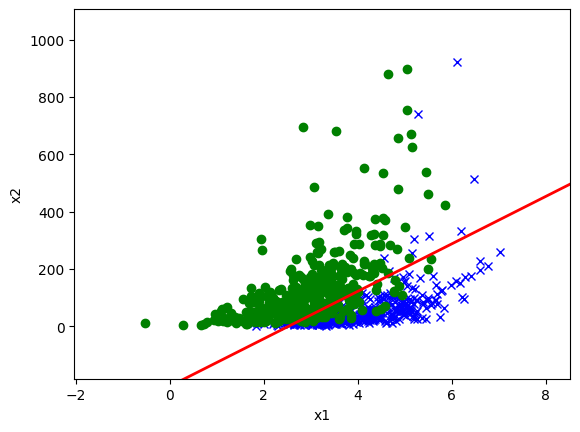

In [82]:
util.plot(x_train, y_train, clf.theta)